## Stock data download and pre-processing
> In this notebook we import stock data from yahoo finance and preprocess it for our neural network input.
    


###  1) Import data_manager module
    
     The data_manager module has helper classes and methods for working with our stock data.
     
   > The module has the following classes that we will use in this notebook:
   
   > ###### Downloader -  
   *Downloads historical end of day stock quotes from yahoo for a given trade symbol 
    and a given date range.*

   > ###### Feature_Selection -
   *Takes DataFrame of yahoo trade data for a given trade symbol
     and performs transformations to creates features for neural network input.*
     
  We will also use the method `'companies()'` to import a list of company trade ticker symbols. 

In [1]:
%load_ext autoreload
%aimport data_manager
%autoreload 1

from data_manager import *

###  2) Import company list
> Here we read a csv file and import a list of company names along with their trade symbol and industry

In [2]:
#read list of companies from csv file
stocks = companies()
stocks

,Company,Symbol,Industry
0,3M,MMM,Conglomerate
1,American Express,AXP,Consumer finance
2,Apple,AAPL,Consumer electronics
3,Boeing,BA,Aerospace and defense
4,Caterpillar,CAT,Construction and mining equipment
5,Chevron,CVX,Oil & gas
6,Cisco Systems,CSCO,Computer networking
7,Coca-Cola,KO,Beverages
8,DowDuPont,DWDP,Chemical industry
9,ExxonMobil,XOM,Oil & gas


In [3]:
#save symbols as list
symbols = stocks['Symbol'].values.tolist()
print(symbols)

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'WBA', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'SNAP', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']


### 3) Download stock quote from yahoo and save to disk
> Here we download data from yahoo finance for each company trade symbol and save it to csv file.
>> The following data is downloaded for each trading date:
* Date
* Open
* High
* Low 
* Close
* Adj Close
* Volume

In [4]:
#YYYYMMDD date format
start_date = '20170601' 
end_date = '20190405'

#download quotes from yahoo and save to directory
for ticker in symbols:
    download = Downloader(ticker,start_date, end_date)
    download.save()

### 4) Feature Selection and Normalization
> In this step we read the trade data that was saved to csv file in step 3 and perform transformations.

>* We use the Feature_Selection class that first read and then calcuates
i) log normal daily returns and ii) [money flow index (MFI)](http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:money_flow_index_mfi).
>* Then we normalize the Adj Closed, log normal returns and the MFI between -1 and 1. 
>* Finally we save to csv file the transformed stock and normalized data.  

In [5]:
file_path = "./data\\{}\\quotes.csv"

for ticker in symbols:
    #check if file exist first
    if os.path.isfile(file_path.format(ticker)):
        feature = Feature_Selection.read_csv(ticker, file_path.format(ticker))
        feature.calculate_features()
        feature.normalize_data()
        feature.save_stock_data()
        feature.save_normalized_data()

### 5) Visualize stock annualized volatility
> * Here we visualize the annualized volatility distribution of our stocks and statistics.


> * We can see that the annualized volatilities of our stocks are normally distributed with a volatility mean of 0.2035.


> * Annualized volatility gives us a good standard measure of the degree of variation in the closing prices of a particular stock.  

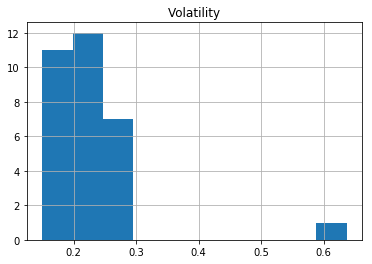

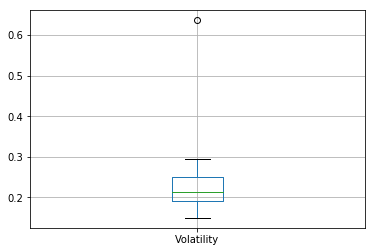

,Volatility
count,31.000000
mean,0.231261
std,0.084343
min,0.149387
25%,0.190253
50%,0.212886
75%,0.249539
max,0.636738


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

vols = [Volatility(ticker).annual for ticker in symbols]
dataset = pd.DataFrame({'Symbol':symbols,'Volatility':vols})

#volatility distribution
dataset.hist()
plt.show()

#box plot to show range
dataset.boxplot()
plt.show()

#volatility statistics
dataset.describe()